In [1]:
from services.main_service import get_coin_data
from services.prophet_service import get_evaluations, train_model
import pandas as pd
from prophet import Prophet
import matplotlib.pylab as plt

SELECTED_COINS = ["ADA-GBP", "BAT-GBP", "BCH-GBP", "BNB-GBP"]

c:\Users\nisha\anaconda3\envs\com724\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


13:53:51 - cmdstanpy - INFO - Chain [1] start processing


Using the cached dataset..


13:53:51 - cmdstanpy - INFO - Chain [1] done processing


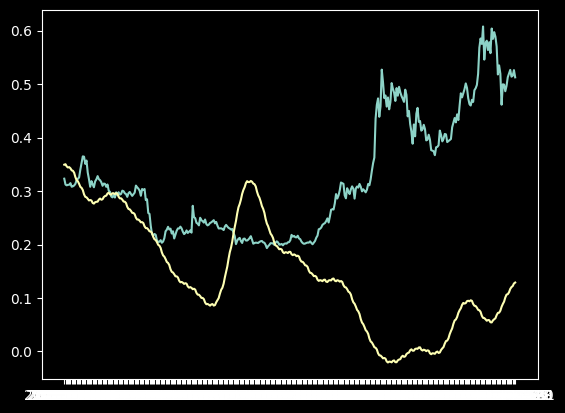

In [3]:
coin_data_df = get_coin_data(SELECTED_COINS)
# coin_data_df = coin_data_df.iloc[] # select last year data
selected_coin = "ADA-GBP"

temp_dataset_df = coin_data_df[selected_coin]
temp_dataset_df = temp_dataset_df.reset_index()
temp_dataset_df.columns = ["ds", "y"]
# temp_dataset_df["cap"] = 0.1
# temp_dataset_df["y_lag7"] = temp_dataset_df['y'].shift(7)
# temp_dataset_df.dropna(inplace=True)

train_size = int(0.8 * len(temp_dataset_df))
train_df = temp_dataset_df.iloc[:train_size]
test_df = temp_dataset_df.iloc[train_size:]

# ==================================================
model = Prophet(
                # changepoint_prior_scale=10, 
                # seasonality_prior_scale=5000.0,
                # growth='linear',
                # daily_seasonality=False, 
                # weekly_seasonality=False,
                # yearly_seasonality=True,
                # interval_width=.5
                )
model.fit(train_df)

prediction = model.predict(test_df.drop(columns="y"))
# prediction = model.make_future_dataframe(periods=365)

plot_prediction = pd.DataFrame({"y": prediction["yhat"].values}, index=test_df["ds"])

plot_test_df = test_df.copy(deep=True)
plot_test_df.index = plot_test_df["ds"]
plot_test_df.drop(columns=["ds"], inplace=True)

plot_train_df = train_df.copy(deep=True)
plot_train_df.index = plot_train_df["ds"]
plot_train_df.drop(columns=["ds"], inplace=True)


plt.plot(plot_test_df)
plt.plot(plot_prediction)

plt.show()

# prediction.plot()

In [68]:
prediction = model.make_future_dataframe(periods=365)
prediction

,ds
0,2023-04-02
1,2023-04-03
2,2023-04-04
3,2023-04-05
4,2023-04-06
...,...
652,2025-01-13
653,2025-01-14
654,2025-01-15
655,2025-01-16


In [6]:
model = Prophet()
coin_data_df = get_coin_data(SELECTED_COINS)
selected_coin = "ADA-GBP"

temp_dataset_df = coin_data_df[selected_coin]
temp_dataset_df = temp_dataset_df.reset_index()
temp_dataset_df.columns = ["ds", "y"]

model.fit(temp_dataset_df)

future = model.make_future_dataframe(7, include_history=False)
future

19:10:00 - cmdstanpy - INFO - Chain [1] start processing
19:10:00 - cmdstanpy - INFO - Chain [1] done processing


,ds
0,2024-04-18
1,2024-04-19
2,2024-04-20
3,2024-04-21
4,2024-04-22
5,2024-04-23
6,2024-04-24


In [7]:
temp_dataset_df

,ds,y
0,2023-04-17,0.364319
1,2023-04-18,0.350877
2,2023-04-19,0.357152
3,2023-04-20,0.334554
4,2023-04-21,0.322123
...,...,...
362,2024-04-13,0.404251
363,2024-04-14,0.359564
364,2024-04-15,0.376340
365,2024-04-16,0.370222
